## Importing required libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from scipy.stats import kruskal
import seaborn as sb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from prophet import Prophet
from matplotlib import pyplot
from prophet.utilities import regressor_coefficients

2023-06-08 12:22:41.490106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-08 12:22:41.490125: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Loading cleaned dataset

In [4]:
df=pd.read_csv("imputed_cleaned_highly_correlated_removed_df.csv")
df=df.drop(["Unnamed: 0"],axis=1)
# Dropping the feature that showed negative values in the later years

df=df.drop(["Population growth (annual %)"],axis=1)
df.head()

,Date,"Population ages 35-39, male (% of male population)","Population ages 30-34, male (% of male population)","Population ages 30-34, female (% of female population)","Population ages 25-29, male (% of male population)","Population ages 20-24, male (% of male population)","Population ages 20-24, female (% of female population)","Population ages 15-64, male (% of male population)","Population ages 05-09, female (% of female population)","Survival to age 65, male (% of cohort)",Domestic general government health expenditure (% of current health expenditure),People using at least basic sanitation services (% of population),"Immunization, measles (% of children ages 12-23 months)","Immunization, DPT (% of children ages 12-23 months)",People using at least basic drinking water services (% of population),Country
0,31/12/2000,10.580224,10.970504,9.675833,11.124948,9.914067,9.630265,71.751589,11.584550,80.639037,71.090942,99.927678,98.0,97.0,99.910081,Bahrain
1,31/12/2001,10.523844,11.257000,9.751845,11.371230,9.581943,9.695009,72.227151,11.445216,81.744027,71.686089,99.933661,98.0,99.0,99.917519,Bahrain
2,31/12/2002,10.564876,11.625352,9.856252,11.507597,9.144013,9.702925,72.721201,11.290628,81.960392,71.251640,99.939643,99.0,98.0,99.924957,Bahrain
3,31/12/2003,10.604646,11.901189,9.866896,11.566314,9.135526,9.741478,73.620983,10.985535,82.677625,65.968887,99.945626,99.0,97.0,99.932395,Bahrain
4,31/12/2004,10.546060,11.983681,9.706156,11.770021,10.018271,9.963415,75.152958,10.445477,83.000012,67.336205,99.951608,99.0,98.0,99.939833,Bahrain


## dropping the indicators that did not give better prediction for future_dataframe in univariate

In [5]:
df=df.drop(["Population ages 20-24, male (% of male population)",
                      "Immunization, DPT (% of children ages 12-23 months)",
                      "People using at least basic sanitation services (% of population)"],axis=1)
df

,Date,"Population ages 35-39, male (% of male population)","Population ages 30-34, male (% of male population)","Population ages 30-34, female (% of female population)","Population ages 25-29, male (% of male population)","Population ages 20-24, female (% of female population)","Population ages 15-64, male (% of male population)","Population ages 05-09, female (% of female population)","Survival to age 65, male (% of cohort)",Domestic general government health expenditure (% of current health expenditure),"Immunization, measles (% of children ages 12-23 months)",People using at least basic drinking water services (% of population),Country
0,31/12/2000,10.580224,10.970504,9.675833,11.124948,9.630265,71.751589,11.584550,80.639037,71.090942,98.0,99.910081,Bahrain
1,31/12/2001,10.523844,11.257000,9.751845,11.371230,9.695009,72.227151,11.445216,81.744027,71.686089,98.0,99.917519,Bahrain
2,31/12/2002,10.564876,11.625352,9.856252,11.507597,9.702925,72.721201,11.290628,81.960392,71.251640,99.0,99.924957,Bahrain
3,31/12/2003,10.604646,11.901189,9.866896,11.566314,9.741478,73.620983,10.985535,82.677625,65.968887,99.0,99.932395,Bahrain
4,31/12/2004,10.546060,11.983681,9.706156,11.770021,9.963415,75.152958,10.445477,83.000012,67.336205,99.0,99.939833,Bahrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,31/12/2017,11.517680,8.777666,8.302687,8.091223,8.507995,74.484292,10.636060,83.388476,71.847023,96.0,99.868177,SaudiArabia
106,31/12/2018,11.232653,8.801515,8.392500,8.084394,8.520168,74.873431,10.542506,83.257354,70.298500,98.0,100.000000,SaudiArabia
107,31/12/2019,11.000090,8.847927,8.518446,8.111693,8.552202,75.191129,10.412855,83.420512,70.298500,95.0,100.000000,SaudiArabia
108,31/12/2020,10.625665,8.620229,8.572281,7.808939,8.320317,74.971633,10.326782,81.632940,70.298500,96.0,100.000000,SaudiArabia


### Getting the future predicted values from the univariate prophet model

In [6]:
Bahrain=pd.read_csv("Bahrain_future.csv")
Bahrain=Bahrain.drop(["Unnamed: 0"],axis=1)

Kuwait=pd.read_csv("Kuwait_future.csv")
Kuwait=Kuwait.drop(["Unnamed: 0"],axis=1)

Oman=pd.read_csv("Oman_future.csv")
Oman=Oman.drop(["Unnamed: 0"],axis=1)

Qatar=pd.read_csv("Qatar_future.csv")
Qatar=Qatar.drop(["Unnamed: 0"],axis=1)

SaudiArabia=pd.read_csv("SaudiArabia_future.csv")
SaudiArabia=SaudiArabia.drop(["Unnamed: 0"],axis=1)

In [7]:
countries=df["Country"].unique().tolist()
#countries
for i in range(len(countries)):
    country=countries[i]
    dataset=df.query("Country==@country")
    dataset=dataset.rename(columns={"index":"Date"})
    dataset=dataset.reset_index()
    dataset=dataset.drop(["Country","index"],axis=1)
    indicators=dataset.columns[1:].tolist()

## Getting the indicator code names

In [9]:
old_df=pd.read_csv("API_8_DS2_en_csv_v2_5458541.csv")
old_df=old_df[["Indicator Name","Indicator Code"]]
old_df=old_df.drop_duplicates()

indicator_code=[]
indicator_name=[]
# for i in range(len(indicators)):
#     if indicators[i] in old_df["Indicator Name"].tolist():
#         print(old_df["Indicator Code"][i])
#         indicator_code.append(old_df["Indicator Code"][i])
        
        
all_indicators=old_df["Indicator Name"].tolist()
all_codes=old_df["Indicator Code"].tolist()
for i in range(len(indicators)):
    for j in range(len(all_indicators)):
        if indicators[i]==all_indicators[j]:
            #print(features[i],all_codes[j])
            #print(all_codes[j])
            indicator_code.append(all_codes[j])
            indicator_name.append(all_indicators[j])

In [10]:
indic_df = pd.DataFrame({'Name': indicator_name, 'Code': indicator_code})
indic_df

,Name,Code
0,"Population ages 35-39, male (% of male populat...",SP.POP.3539.MA.5Y
1,"Population ages 30-34, male (% of male populat...",SP.POP.3034.MA.5Y
2,"Population ages 30-34, female (% of female pop...",SP.POP.3034.FE.5Y
3,"Population ages 25-29, male (% of male populat...",SP.POP.2529.MA.5Y
4,"Population ages 20-24, female (% of female pop...",SP.POP.2024.FE.5Y
5,"Population ages 15-64, male (% of male populat...",SP.POP.1564.MA.ZS
6,"Population ages 05-09, female (% of female pop...",SP.POP.0509.FE.5Y
7,"Survival to age 65, male (% of cohort)",SP.DYN.TO65.MA.ZS
8,Domestic general government health expenditure...,SH.XPD.GHED.CH.ZS
9,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS


In [11]:
indic_df.to_csv("indic_df.csv")

In [12]:
def get_country_specific_dataset(df, country):
    dataset=df.query("Country==@country")
    dataset=dataset.rename(columns={"index":"Date"})
    dataset=dataset.reset_index()
    dataset=dataset.drop(["Country","index"],axis=1)
    indicators=dataset.columns[1:].tolist()
    print(color.BOLD+countries[k]+color.END)
    #making date as the index of the dataset
    dataset=dataset.dropna(axis=1, how='all')
    dataset = dataset.set_index(['Date'])
    return dataset


def get_country_specific_dataset_2(df, country):
    dataset=df.query("Country==@country")
    dataset=dataset.rename(columns={"index":"Date"})
    dataset=dataset.reset_index()
    dataset=dataset.drop(["Country"],axis=1)
    indicators=dataset.columns[1:].tolist()
    print(color.BOLD+countries[k]+color.END)
    #making date as the index of the dataset
    dataset=dataset.dropna(axis=1, how='all')
    dataset = dataset.set_index(['Date'])
    return dataset

In [13]:
def get_indicator_code(old_df,train_df):
    name_df=old_df
    all_indicators=old_df["Indicator Name"].tolist()
    all_codes=old_df["Indicator Code"].tolist()
    indicators_in_the_country=train_df.columns.tolist()
    indicator_code_in_the_country=[]
    for i in range(len(indicators_in_the_country)):
        for j in range(len(all_indicators)):
            if indicators_in_the_country[i]==all_indicators[j]:
                indicator_code_in_the_country.append(all_codes[j])
    return indicator_code_in_the_country

In [14]:
# y_true: true values of the dependent variable
# y_pred: predicted values of the dependent variable
# n: number of observations
# k: number of predictors
def adjusted_r2_score(y_true, y_pred, n, k):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [15]:
indicators_list=df.drop(["Date","Country"],axis=1).columns.tolist()
indicators_list

['Population ages 35-39, male (% of male population)',
 'Population ages 30-34, male (% of male population)',
 'Population ages 30-34, female (% of female population)',
 'Population ages 25-29, male (% of male population)',
 'Population ages 20-24, female (% of female population)',
 'Population ages 15-64, male (% of male population)',
 'Population ages 05-09, female (% of female population)',
 'Survival to age 65, male (% of cohort)',
 'Domestic general government health expenditure (% of current health expenditure)',
 'Immunization, measles (% of children ages 12-23 months)',
 'People using at least basic drinking water services (% of population)']

## Run multivariate it for all the countries

17:11:11 - cmdstanpy - INFO - Chain [1] start processing


Country: Bahrain
Bahrain


17:11:18 - cmdstanpy - INFO - Chain [1] done processing
17:11:18 - cmdstanpy - INFO - Chain [1] start processing


Bahrain
Indicator: Population ages 35-39, male (% of male population)
RMSE: 0.0005174711610741351
MAPE: 4.431830952286769e-05
R-squared: 0.9999998295371542
Adjusted R-squared: 0.9999996420280237

Bahrain


17:11:25 - cmdstanpy - INFO - Chain [1] done processing
17:11:26 - cmdstanpy - INFO - Chain [1] start processing


Bahrain
Indicator: Population ages 30-34, male (% of male population)
RMSE: 6.15216215741746e-05
MAPE: 3.972594326997706e-06
R-squared: 0.9999999987266137
Adjusted R-squared: 0.9999999973258888

Bahrain


17:11:33 - cmdstanpy - INFO - Chain [1] done processing
17:11:33 - cmdstanpy - INFO - Chain [1] start processing


Bahrain
Indicator: Population ages 30-34, female (% of female population)
RMSE: 6.226659529870951e-05
MAPE: 5.4330029974600965e-06
R-squared: 0.9999999793949438
Adjusted R-squared: 0.9999999567293819

Bahrain


17:11:40 - cmdstanpy - INFO - Chain [1] done processing
17:11:40 - cmdstanpy - INFO - Chain [1] start processing


Bahrain
Indicator: Population ages 25-29, male (% of male population)
RMSE: 0.0005302832261761076
MAPE: 3.952764770856659e-05
R-squared: 0.9999999313707941
Adjusted R-squared: 0.9999998558786677

Bahrain


17:11:48 - cmdstanpy - INFO - Chain [1] done processing
17:11:48 - cmdstanpy - INFO - Chain [1] start processing


Bahrain
Indicator: Population ages 20-24, female (% of female population)
RMSE: 0.0004805455396776422
MAPE: 5.2202510964104706e-05
R-squared: 0.9999998307961143
Adjusted R-squared: 0.9999996446718401

Bahrain


17:11:55 - cmdstanpy - INFO - Chain [1] done processing
17:11:55 - cmdstanpy - INFO - Chain [1] start processing


Bahrain
Indicator: Population ages 15-64, male (% of male population)
RMSE: 0.00012234400147648731
MAPE: 1.2976928515101195e-06
R-squared: 0.9999999986816624
Adjusted R-squared: 0.9999999972314911

Bahrain


17:11:56 - cmdstanpy - INFO - Chain [1] done processing
17:11:56 - cmdstanpy - INFO - Chain [1] start processing


Bahrain
Indicator: Population ages 05-09, female (% of female population)
RMSE: 4.7863961752244866e-05
MAPE: 4.885603323646042e-06
R-squared: 0.9999999976384087
Adjusted R-squared: 0.9999999950406584

Bahrain


17:12:03 - cmdstanpy - INFO - Chain [1] done processing
17:12:03 - cmdstanpy - INFO - Chain [1] start processing
17:12:03 - cmdstanpy - INFO - Chain [1] done processing


Bahrain
Indicator: Survival to age 65, male (% of cohort)
RMSE: 0.0003852610727522613
MAPE: 4.431913043695041e-06
R-squared: 0.9999999800274454
Adjusted R-squared: 0.9999999580576353

Bahrain
Bahrain
Indicator: Domestic general government health expenditure (% of current health expenditure)
RMSE: 1.145603108487997
MAPE: 0.01396707693215234
R-squared: 0.9162809737875645
Adjusted R-squared: 0.8241900449538854



17:12:03 - cmdstanpy - INFO - Chain [1] start processing


Bahrain


17:12:10 - cmdstanpy - INFO - Chain [1] done processing
17:12:11 - cmdstanpy - INFO - Chain [1] start processing


Bahrain
Indicator: Immunization, measles (% of children ages 12-23 months)
RMSE: 0.002107216547707827
MAPE: 2.1275539883545163e-05
R-squared: 0.9999462716248949
Adjusted R-squared: 0.9998871704122794

Bahrain


17:12:18 - cmdstanpy - INFO - Chain [1] done processing
17:12:18 - cmdstanpy - INFO - Chain [1] start processing


Bahrain
Indicator: People using at least basic drinking water services (% of population)
RMSE: 0.0011473997672158123
MAPE: 1.1452670052339478e-05
R-squared: 0.9986193477754826
Adjusted R-squared: 0.9971006303285134

Bahrain
Country: Kuwait
Kuwait


17:12:25 - cmdstanpy - INFO - Chain [1] done processing
17:12:25 - cmdstanpy - INFO - Chain [1] start processing


Kuwait
Indicator: Population ages 35-39, male (% of male population)
RMSE: 0.0002417831759817479
MAPE: 1.980782216445518e-05
R-squared: 0.9999999446617861
Adjusted R-squared: 0.9999998837897508

Kuwait


17:12:33 - cmdstanpy - INFO - Chain [1] done processing
17:12:33 - cmdstanpy - INFO - Chain [1] start processing


Kuwait
Indicator: Population ages 30-34, male (% of male population)
RMSE: 0.00023616903947399237
MAPE: 1.9639187775336966e-05
R-squared: 0.999999989767068
Adjusted R-squared: 0.9999999785108429

Kuwait


17:12:40 - cmdstanpy - INFO - Chain [1] done processing
17:12:40 - cmdstanpy - INFO - Chain [1] start processing
17:12:40 - cmdstanpy - INFO - Chain [1] done processing


Kuwait
Indicator: Population ages 30-34, female (% of female population)
RMSE: 2.188454504941234e-05
MAPE: 1.7832814004963277e-06
R-squared: 0.9999999996582992
Adjusted R-squared: 0.9999999992824283

Kuwait
Kuwait
Indicator: Population ages 25-29, male (% of male population)
RMSE: 0.02861972806811693
MAPE: 0.0029045065172910584
R-squared: 0.9999356401169677
Adjusted R-squared: 0.9998648442456322

Kuwait


17:12:40 - cmdstanpy - INFO - Chain [1] start processing
17:12:48 - cmdstanpy - INFO - Chain [1] done processing
17:12:48 - cmdstanpy - INFO - Chain [1] start processing


Kuwait
Indicator: Population ages 20-24, female (% of female population)
RMSE: 1.5725698158228057e-05
MAPE: 2.028254437138877e-06
R-squared: 0.9999999999442726
Adjusted R-squared: 0.9999999998829724

Kuwait


17:12:55 - cmdstanpy - INFO - Chain [1] done processing
17:12:55 - cmdstanpy - INFO - Chain [1] start processing


Kuwait
Indicator: Population ages 15-64, male (% of male population)
RMSE: 0.00038418103536681363
MAPE: 4.090248723633353e-06
R-squared: 0.9999999162410479
Adjusted R-squared: 0.9999998241062006

Kuwait


17:13:02 - cmdstanpy - INFO - Chain [1] done processing
17:13:03 - cmdstanpy - INFO - Chain [1] start processing


Kuwait
Indicator: Population ages 05-09, female (% of female population)
RMSE: 8.985337990980324e-05
MAPE: 9.850285421102936e-06
R-squared: 0.9999999896364895
Adjusted R-squared: 0.999999978236628

Kuwait


17:13:10 - cmdstanpy - INFO - Chain [1] done processing
17:13:10 - cmdstanpy - INFO - Chain [1] start processing


Kuwait
Indicator: Survival to age 65, male (% of cohort)
RMSE: 0.0004952206233345113
MAPE: 5.615009066369867e-06
R-squared: 0.999999946117323
Adjusted R-squared: 0.9999998868463783

Kuwait


17:13:17 - cmdstanpy - INFO - Chain [1] done processing
17:13:17 - cmdstanpy - INFO - Chain [1] start processing


Kuwait
Indicator: Domestic general government health expenditure (% of current health expenditure)
RMSE: 0.0027983301545040904
MAPE: 3.3989296638781406e-05
R-squared: 0.9999996885405039
Adjusted R-squared: 0.9999993459350582

Kuwait


17:13:25 - cmdstanpy - INFO - Chain [1] done processing
17:13:25 - cmdstanpy - INFO - Chain [1] start processing


Kuwait
Indicator: Immunization, measles (% of children ages 12-23 months)
RMSE: 0.00042444450909674903
MAPE: 4.14997017399155e-06
R-squared: 0.9999999498884365
Adjusted R-squared: 0.9999998947657167

Kuwait
Kuwait
Indicator: People using at least basic drinking water services (% of population)
RMSE: 2.842170943040401e-14
MAPE: 2.8421709430404013e-16
R-squared: 0.0
Adjusted R-squared: -1.1

Kuwait
Country: Oman
Oman


17:13:32 - cmdstanpy - INFO - Chain [1] done processing
17:13:32 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: Population ages 35-39, male (% of male population)
RMSE: 0.00014260197054328906
MAPE: 1.435522653560654e-05
R-squared: 0.9999999947512568
Adjusted R-squared: 0.9999999889776392

Oman


17:13:40 - cmdstanpy - INFO - Chain [1] done processing
17:13:40 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: Population ages 30-34, male (% of male population)
RMSE: 0.00015620198830751595
MAPE: 1.22345480128581e-05
R-squared: 0.999999997581267
Adjusted R-squared: 0.9999999949206607

Oman


17:13:47 - cmdstanpy - INFO - Chain [1] done processing


Oman
Indicator: Population ages 30-34, female (% of female population)
RMSE: 1.6569439607022107e-05
MAPE: 1.491144178035792e-06
R-squared: 0.9999999999129789
Adjusted R-squared: 0.9999999998172557

Oman


17:13:47 - cmdstanpy - INFO - Chain [1] start processing
17:13:54 - cmdstanpy - INFO - Chain [1] done processing
17:13:55 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: Population ages 25-29, male (% of male population)
RMSE: 1.4220085331216801e-05
MAPE: 9.118124333539286e-07
R-squared: 0.9999999999825216
Adjusted R-squared: 0.9999999999632955

Oman


17:14:02 - cmdstanpy - INFO - Chain [1] done processing
17:14:02 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: Population ages 20-24, female (% of female population)
RMSE: 0.0001133909608049566
MAPE: 1.06770687673511e-05
R-squared: 0.9999999946271868
Adjusted R-squared: 0.9999999887170923

Oman


17:14:09 - cmdstanpy - INFO - Chain [1] done processing
17:14:09 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: Population ages 15-64, male (% of male population)
RMSE: 0.0028044141401907343
MAPE: 3.6939974907070884e-05
R-squared: 0.9999997668837318
Adjusted R-squared: 0.9999995104558368

Oman


17:14:16 - cmdstanpy - INFO - Chain [1] done processing
17:14:17 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: Population ages 05-09, female (% of female population)
RMSE: 0.00017970468273057394
MAPE: 1.566783614054074e-05
R-squared: 0.9999999839784113
Adjusted R-squared: 0.9999999663546637

Oman


17:14:24 - cmdstanpy - INFO - Chain [1] done processing
17:14:24 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: Survival to age 65, male (% of cohort)
RMSE: 0.0019359678868762383
MAPE: 2.3755975117312084e-05
R-squared: 0.999999779396148
Adjusted R-squared: 0.9999995367319109

Oman


17:14:31 - cmdstanpy - INFO - Chain [1] done processing
17:14:31 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: Domestic general government health expenditure (% of current health expenditure)
RMSE: 0.0005010437530057005
MAPE: 5.222683702269862e-06
R-squared: 0.9999999822112449
Adjusted R-squared: 0.9999999626436142

Oman


17:14:38 - cmdstanpy - INFO - Chain [1] done processing
17:14:39 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: Immunization, measles (% of children ages 12-23 months)
RMSE: 0.0012310932794175997
MAPE: 1.2252988593911808e-05
R-squared: 0.9999974964304412
Adjusted R-squared: 0.9999947425039266

Oman


17:14:46 - cmdstanpy - INFO - Chain [1] done processing
17:14:46 - cmdstanpy - INFO - Chain [1] start processing


Oman
Indicator: People using at least basic drinking water services (% of population)
RMSE: 0.0009732165131475332
MAPE: 1.096350531248379e-05
R-squared: 0.9999998289355619
Adjusted R-squared: 0.9999996407646801

Oman
Country: Qatar
Qatar


17:14:53 - cmdstanpy - INFO - Chain [1] done processing
17:14:53 - cmdstanpy - INFO - Chain [1] start processing


Qatar
Indicator: Population ages 35-39, male (% of male population)
RMSE: 3.7109418308908264e-05
MAPE: 2.71856959226509e-06
R-squared: 0.9999999991759178
Adjusted R-squared: 0.9999999982694273

Qatar


17:15:00 - cmdstanpy - INFO - Chain [1] done processing
17:15:00 - cmdstanpy - INFO - Chain [1] start processing


Qatar
Indicator: Population ages 30-34, male (% of male population)
RMSE: 0.00021245811351820908
MAPE: 1.307917579150427e-05
R-squared: 0.999999988736029
Adjusted R-squared: 0.999999976345661

Qatar


17:15:08 - cmdstanpy - INFO - Chain [1] done processing
17:15:08 - cmdstanpy - INFO - Chain [1] start processing


Qatar
Indicator: Population ages 30-34, female (% of female population)
RMSE: 0.0003214212259697662
MAPE: 2.5469609851106944e-05
R-squared: 0.9999999592258678
Adjusted R-squared: 0.9999999143743225

Qatar


17:15:15 - cmdstanpy - INFO - Chain [1] done processing
17:15:15 - cmdstanpy - INFO - Chain [1] start processing
17:15:15 - cmdstanpy - INFO - Chain [1] done processing


Qatar
Indicator: Population ages 25-29, male (% of male population)
RMSE: 0.00016469810246523968
MAPE: 9.843368630731335e-06
R-squared: 0.9999999965664257
Adjusted R-squared: 0.9999999927894939

Qatar
Qatar
Indicator: Population ages 20-24, female (% of female population)
RMSE: 0.14267612698934967
MAPE: 0.016023675088539538
R-squared: 0.9896280920619811
Adjusted R-squared: 0.9782189933301603

Qatar


17:15:15 - cmdstanpy - INFO - Chain [1] start processing
17:15:23 - cmdstanpy - INFO - Chain [1] done processing
17:15:23 - cmdstanpy - INFO - Chain [1] start processing


Qatar
Indicator: Population ages 15-64, male (% of male population)
RMSE: 0.00021906933297475236
MAPE: 2.4924228618132044e-06
R-squared: 0.9999999957281653
Adjusted R-squared: 0.9999999910291472

Qatar


17:15:30 - cmdstanpy - INFO - Chain [1] done processing
17:15:30 - cmdstanpy - INFO - Chain [1] start processing


Qatar
Indicator: Population ages 05-09, female (% of female population)
RMSE: 0.00011753090886860076
MAPE: 1.1624118105670322e-05
R-squared: 0.999999981613028
Adjusted R-squared: 0.9999999613873589

Qatar


17:15:37 - cmdstanpy - INFO - Chain [1] done processing
17:15:37 - cmdstanpy - INFO - Chain [1] start processing
17:15:37 - cmdstanpy - INFO - Chain [1] done processing


Qatar
Indicator: Survival to age 65, male (% of cohort)
RMSE: 0.0005844628674091824
MAPE: 6.717667781825219e-06
R-squared: 0.9999999745578412
Adjusted R-squared: 0.9999999465714665

Qatar
Qatar
Indicator: Domestic general government health expenditure (% of current health expenditure)
RMSE: 0.5824704007743745
MAPE: 0.0065926584735621135
R-squared: 0.9928985298895466
Adjusted R-squared: 0.9850869127680479



17:15:38 - cmdstanpy - INFO - Chain [1] start processing


Qatar


17:15:45 - cmdstanpy - INFO - Chain [1] done processing
17:15:45 - cmdstanpy - INFO - Chain [1] start processing


Qatar
Indicator: Immunization, measles (% of children ages 12-23 months)
RMSE: 0.00022482368220400943
MAPE: 1.9675963312697744e-06
R-squared: 0.9999999945743817
Adjusted R-squared: 0.9999999886062017

Qatar


17:15:52 - cmdstanpy - INFO - Chain [1] done processing
17:15:52 - cmdstanpy - INFO - Chain [1] start processing


Qatar
Indicator: People using at least basic drinking water services (% of population)
RMSE: 0.0003876856008523825
MAPE: 3.851449323768047e-06
R-squared: 0.9999955101001271
Adjusted R-squared: 0.9999905712102669

Qatar
Country: SaudiArabia
SaudiArabia


17:16:00 - cmdstanpy - INFO - Chain [1] done processing
17:16:00 - cmdstanpy - INFO - Chain [1] start processing


SaudiArabia
Indicator: Population ages 35-39, male (% of male population)
RMSE: 0.0002010406544224907
MAPE: 1.8582646896241157e-05
R-squared: 0.9999999608638419
Adjusted R-squared: 0.999999917814068

SaudiArabia


17:16:07 - cmdstanpy - INFO - Chain [1] done processing
17:16:07 - cmdstanpy - INFO - Chain [1] start processing


SaudiArabia
Indicator: Population ages 30-34, male (% of male population)
RMSE: 1.1838221636865493e-05
MAPE: 9.793588571709902e-07
R-squared: 0.9999999999349893
Adjusted R-squared: 0.9999999998634777

SaudiArabia


17:16:14 - cmdstanpy - INFO - Chain [1] done processing
17:16:14 - cmdstanpy - INFO - Chain [1] start processing


SaudiArabia
Indicator: Population ages 30-34, female (% of female population)
RMSE: 7.448885199644259e-05
MAPE: 8.385913019853882e-06
R-squared: 0.9999999752138978
Adjusted R-squared: 0.9999999479491855

SaudiArabia


17:16:22 - cmdstanpy - INFO - Chain [1] done processing
17:16:22 - cmdstanpy - INFO - Chain [1] start processing


SaudiArabia
Indicator: Population ages 25-29, male (% of male population)
RMSE: 0.00019119815089955336
MAPE: 1.840722742545472e-05
R-squared: 0.9999999893873608
Adjusted R-squared: 0.9999999777134576

SaudiArabia


17:16:29 - cmdstanpy - INFO - Chain [1] done processing
17:16:29 - cmdstanpy - INFO - Chain [1] start processing


SaudiArabia
Indicator: Population ages 20-24, female (% of female population)
RMSE: 9.5410552072621e-05
MAPE: 1.041264795946233e-05
R-squared: 0.9999999718423946
Adjusted R-squared: 0.9999999408690288

SaudiArabia


17:16:36 - cmdstanpy - INFO - Chain [1] done processing
17:16:36 - cmdstanpy - INFO - Chain [1] start processing


SaudiArabia
Indicator: Population ages 15-64, male (% of male population)
RMSE: 0.0016004317240188833
MAPE: 2.2498502367869706e-05
R-squared: 0.9999997398572869
Adjusted R-squared: 0.9999994537003024

SaudiArabia


17:16:44 - cmdstanpy - INFO - Chain [1] done processing
17:16:44 - cmdstanpy - INFO - Chain [1] start processing


SaudiArabia
Indicator: Population ages 05-09, female (% of female population)
RMSE: 0.00017057224635077544
MAPE: 1.4471657425518653e-05
R-squared: 0.9999999877870928
Adjusted R-squared: 0.9999999743528948

SaudiArabia


17:16:51 - cmdstanpy - INFO - Chain [1] done processing
17:16:51 - cmdstanpy - INFO - Chain [1] start processing
17:16:51 - cmdstanpy - INFO - Chain [1] done processing


SaudiArabia
Indicator: Survival to age 65, male (% of cohort)
RMSE: 0.0015539115745951454
MAPE: 1.911563369290417e-05
R-squared: 0.9999995825255256
Adjusted R-squared: 0.9999991233036036

SaudiArabia
SaudiArabia
Indicator: Domestic general government health expenditure (% of current health expenditure)
RMSE: 0.7680649796711757
MAPE: 0.008486616938733349
R-squared: 0.9312674581587325
Adjusted R-squared: 0.8556616621333382



17:16:51 - cmdstanpy - INFO - Chain [1] start processing


SaudiArabia


17:16:59 - cmdstanpy - INFO - Chain [1] done processing
17:16:59 - cmdstanpy - INFO - Chain [1] start processing


SaudiArabia
Indicator: Immunization, measles (% of children ages 12-23 months)
RMSE: 0.0007561837759765375
MAPE: 7.69397524882571e-06
R-squared: 0.9999996796783228
Adjusted R-squared: 0.9999993273244779

SaudiArabia


17:17:06 - cmdstanpy - INFO - Chain [1] done processing


SaudiArabia
Indicator: People using at least basic drinking water services (% of population)
RMSE: 0.0015924069585530405
MAPE: 1.6115809252034335e-05
R-squared: 0.9999969525609564
Adjusted R-squared: 0.9999936003780086

SaudiArabia


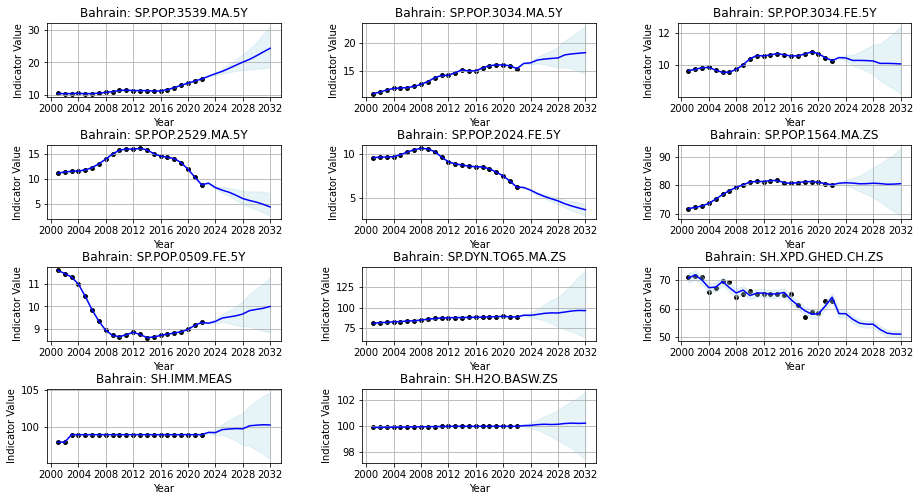

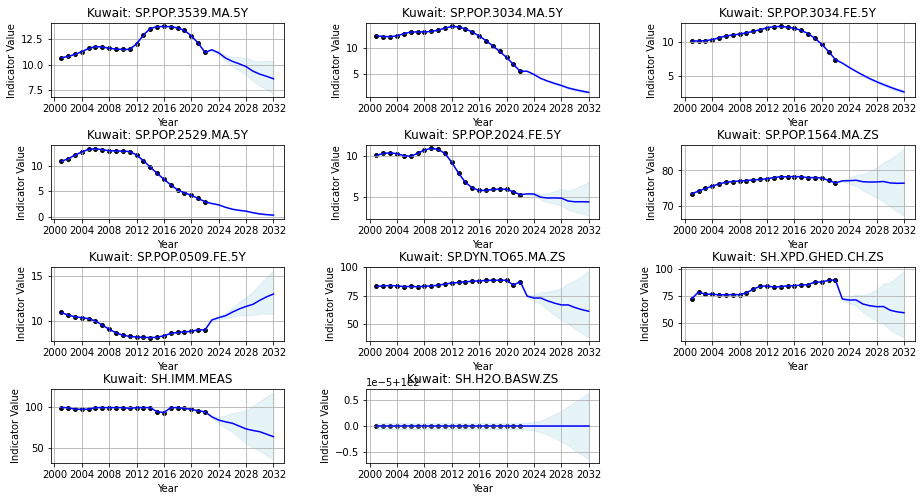

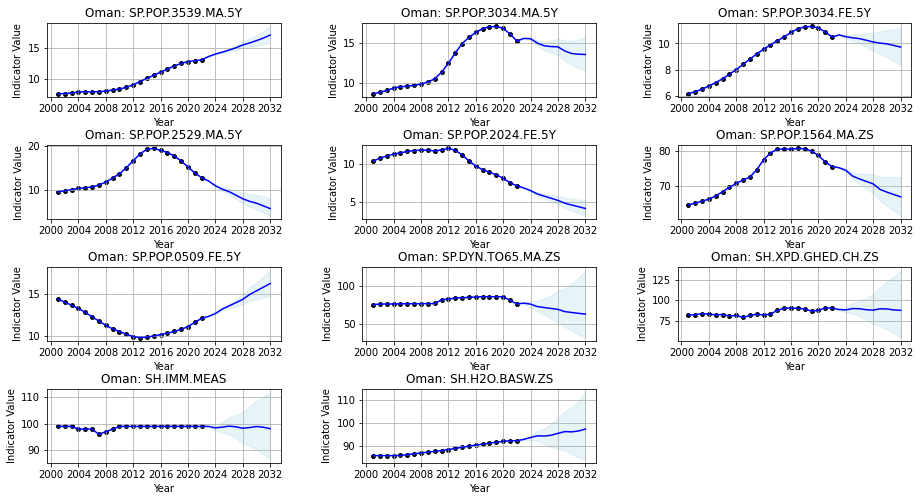

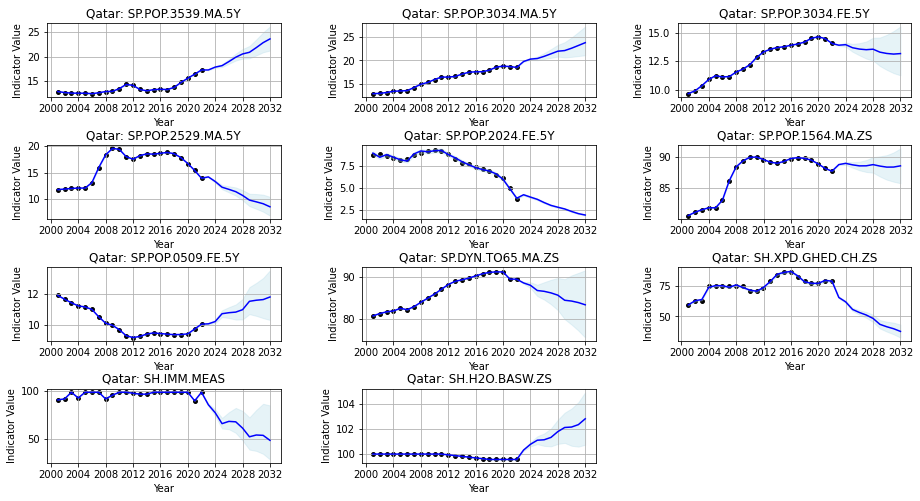

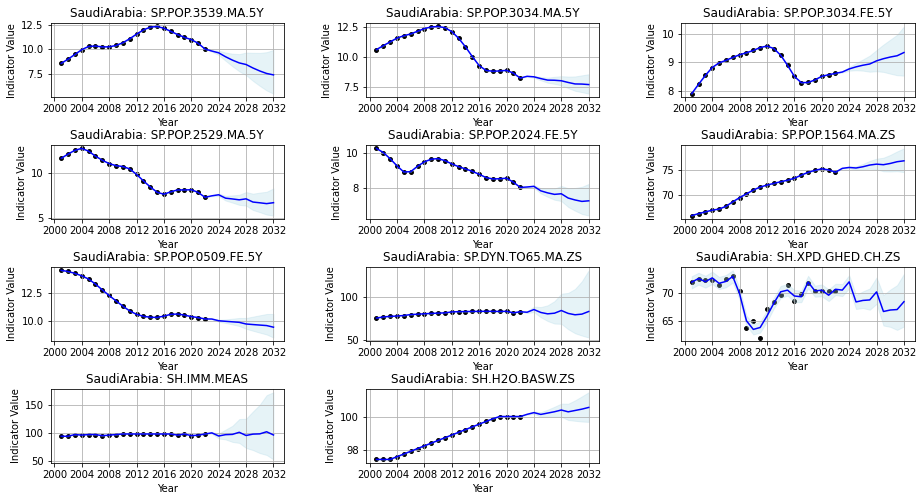

In [46]:
dff_all_indicators_all_countries=pd.DataFrame()

countries=df["Country"].unique().tolist()

for k in range(len(countries)):
#     if k>0:
#         break
    
    plt.figure(figsize=(15, 12))
    
    country=countries[k]
    
    print("Country:",country)
    # Load your dataframe
    dataset=get_country_specific_dataset(df, country)
    
    #display(dataset)
    
    dataset=dataset.reset_index()
    columns_to_exclude= ['Date', 'Country']
    df_log_scaled = dataset.apply(lambda x: np.log1p(x) if x.name not in columns_to_exclude else x)
    dataset=df_log_scaled
    
    column_list=dataset.columns.tolist()
    
    # Prepare the dataframe for Prophet
    df_prophet = dataset.rename(columns={'Date': 'ds'})

    # Create a separate model for each indicator
    models = {}

    indicators=indicators_list
    
    dff_all_indicators_one_country=pd.DataFrame()
    for indicator in indicators:
        #print(indicator)
        dataset1=dataset
        #indicator='Population growth (annual %)'
        dataset1=dataset1.rename(columns={"Date":'ds'})
        dataset1["ds"]=pd.to_datetime(dataset1["ds"])
        model=Prophet()
        list_needed_indicators=dataset1.drop(["ds"],axis=1).columns.tolist()
        for i in range(len(list_needed_indicators)):
            #print(i+1)
            if indicator==list_needed_indicators[i]:
                continue
            #print(list_needed_indicators[i])
            model.add_regressor(list_needed_indicators[i])

        df_prophet=dataset1
        df_prophet=df_prophet.rename(columns={indicator:"y"})
        model.fit(df_prophet)
        #display(regressor_coefficients(model))
        if k==0:
            df_future_values=Bahrain
        elif k==1:
            df_future_values=Kuwait
        elif k==2:
            df_future_values=Oman
        elif k==3:
            df_future_values=Qatar
        elif k==4:
            df_future_values=SaudiArabia
        
        df_future_values=df_future_values.rename(columns={indicator:"y"})
        forecast_future = model.predict(df_future_values)
        actual_existing= model.predict(df_prophet)
        
        
        # Get the actual values from your original dataframe (df) for the specific indicators
        actual_values = get_country_specific_dataset(df, country)[indicator].values

        # Get the predicted values for the specific indicators
        predicted_values = pd.DataFrame(actual_existing["yhat"]).apply(lambda x: np.expm1(x))["yhat"].values

        # Calculate RMSE for each indicator
        rmse_values = np.sqrt(mean_squared_error(actual_values, predicted_values, multioutput='raw_values'))

        # Calculate MAPE for each indicator
        mape_values = mean_absolute_percentage_error(actual_values, predicted_values, multioutput='raw_values')

        # Calculate R-squared for each indicator
        r2_values = r2_score(actual_values, predicted_values, multioutput='raw_values')
    

        n = len(actual_values)
        kk = 11
        adjusted_r2 = adjusted_r2_score(actual_values, predicted_values, n, kk)

        # Print the RMSE, MAPE, and R-squared values for each indicator
        #for i, indicator in enumerate(indicators):
        print("Indicator:", indicator)
        print("RMSE:", rmse_values[0])
        print("MAPE:", mape_values[0])
        print("R-squared:", r2_values[0])
        print("Adjusted R-squared:", adjusted_r2)
        print()
        
        
        
        all_df=pd.concat([actual_existing,forecast_future],axis=0)
        # model.plot(forecast)
        # model.plot(actual)
        #model.plot(all_df)
        
        columns_to_exclude = ['ds']
        merged_df_inv_forecast = all_df.apply(lambda x: np.expm1(x) if x.name not in columns_to_exclude else x)
        
        merged_df_inv_original=get_country_specific_dataset(df, country)[indicator]
        merged_df_inv_original=pd.DataFrame(merged_df_inv_original).reset_index().rename(columns={indicator:"y"})
        merged_df_inv_original["Date"]=pd.to_datetime(merged_df_inv_original["Date"])
        merged_df_inv_original=merged_df_inv_original.rename(columns={"Date":"ds"})

        # Step 5: Create a new dataframe with original and predicted values
        df_combined = pd.concat([merged_df_inv_original.set_index('ds'), merged_df_inv_forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]], axis=1)

        df_combined=df_combined.reset_index()

        # Assuming you have a DataFrame with columns 'ds', 'y', 'yhat', 'yhat_lower', and 'yhat_upper'
        # df = ...
        
        ax = plt.subplot(5, 3, indic_df.query("Name==@indicator").index.values[0]+1)
        plt.subplots_adjust(left=0.1, bottom=0.25, right=0.9, top=0.9, wspace=0.35, hspace=0.65)


        # Plotting the observed data 'y'
        ax.scatter(df_combined['ds'], df_combined['y'], label='Observed', color='black', s=15)

        # Plotting the predicted values 'yhat'
        ax.plot(df_combined['ds'], df_combined['yhat'], label='Predicted', color='blue')

        # Filling the area between the upper and lower bounds
        ax.fill_between(df_combined['ds'], df_combined['yhat_lower'], df_combined['yhat_upper'], alpha=0.3, color='lightblue')

        # Adding legend
        #plt.legend()
        plt.grid()
        # Display the plot
        #plt.show()

        #model.plot(df_original, ax=ax)
        plt.xlabel('Year')
        plt.ylabel('Indicator Value')
        plt.title(str(countries[k][0:len(countries[k])])+': '+str(indic_df.query("Name==@indicator")["Code"].values[0]))

#         ax = plt.subplot(5, 3, indic_df.query("Name==@indicator").index.values[0]+1)
#         model.plot(all_df, ax=ax)
#         plt.xlabel('Year')
#         plt.ylabel('Indicator Value')
#         plt.title(str(countries[k][0:len(countries[k])])+': '+str(indic_df.query("Name==@indicator")["Code"].values[0]))
        
        
        #display(indicator)
        if indicator=='Population ages 35-39, male (% of male population)':
            dff=all_df[["ds","yhat","yhat_lower","yhat_upper"]]
        else:
            dff=all_df[["yhat","yhat_lower","yhat_upper"]]
        dff=dff.reset_index()
        dff=dff.drop(["index"],axis=1)
        dff["y"]=df_combined['y'].apply(lambda x: np.log1p(x))
        dff=dff.rename(columns={"yhat":indicator,"yhat_lower":indicator+"_yhat_lower","yhat_upper":indicator+"_yhat_upper","y":indicator+"_y"})

        dff_all_indicators_one_country=pd.concat([dff_all_indicators_one_country,dff],axis=1)
    
    dff_all_indicators_one_country["Country"]=countries[k]
    
    dff_all_indicators_all_countries=pd.concat([dff_all_indicators_all_countries,dff_all_indicators_one_country],axis=0)

In [49]:
dff_all_indicators_all_countries
columns_to_exclude = ['ds','Country']
dff_all_indicators_all_countries_inv = dff_all_indicators_all_countries.apply(lambda x: np.expm1(x) if x.name not in columns_to_exclude else x)
dff_all_indicators_all_countries_inv ##these are the forecasted values for all the years for all indicators

,ds,"Population ages 35-39, male (% of male population)","Population ages 35-39, male (% of male population)_yhat_lower","Population ages 35-39, male (% of male population)_yhat_upper","Population ages 35-39, male (% of male population)_y","Population ages 30-34, male (% of male population)","Population ages 30-34, male (% of male population)_yhat_lower","Population ages 30-34, male (% of male population)_yhat_upper","Population ages 30-34, male (% of male population)_y","Population ages 30-34, female (% of female population)",...,Domestic general government health expenditure (% of current health expenditure)_y,"Immunization, measles (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)_yhat_lower","Immunization, measles (% of children ages 12-23 months)_yhat_upper","Immunization, measles (% of children ages 12-23 months)_y",People using at least basic drinking water services (% of population),People using at least basic drinking water services (% of population)_yhat_lower,People using at least basic drinking water services (% of population)_yhat_upper,People using at least basic drinking water services (% of population)_y,Country
0,2000-12-31,10.580691,10.580691,10.580691,10.580224,10.970490,10.970490,10.970490,10.970504,9.675855,...,71.090942,98.001961,98.001961,98.001961,98.0,99.911314,99.911314,99.911314,99.910081,Bahrain
1,2001-12-31,10.524324,10.524324,10.524324,10.523844,11.256967,11.256967,11.256967,11.257000,9.751891,...,71.686089,98.002058,98.002058,98.002058,98.0,99.918689,99.918689,99.918689,99.917519,Bahrain
2,2002-12-31,10.565372,10.565372,10.565372,10.564876,11.625298,11.625298,11.625298,11.625352,9.856322,...,71.251640,99.002175,99.002175,99.002175,99.0,99.926060,99.926060,99.926060,99.924957,Bahrain
3,2003-12-31,10.605159,10.605159,10.605159,10.604646,11.901113,11.901113,11.901113,11.901189,9.866989,...,65.968887,99.002268,99.002268,99.002268,99.0,99.933428,99.933428,99.933428,99.932395,Bahrain
4,2004-12-31,10.546517,10.546517,10.546517,10.546060,11.983662,11.983662,11.983662,11.983681,9.706176,...,67.336205,99.001982,99.001982,99.001982,99.0,99.941069,99.941069,99.941069,99.939833,Bahrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,2027-12-31,8.453947,7.369831,9.671952,NaN,7.982831,7.601338,8.363369,NaN,9.054587,...,NaN,95.316170,72.908835,125.416489,NaN,100.384377,99.992416,100.762742,NaN,SaudiArabia
28,2028-12-31,8.098489,6.786827,9.650068,NaN,7.841206,7.369959,8.333613,NaN,9.128766,...,NaN,97.756421,69.150539,138.451894,NaN,100.278503,99.794931,100.757321,NaN,SaudiArabia
29,2029-12-31,7.793507,6.274241,9.640793,NaN,7.717673,7.148734,8.341975,NaN,9.186613,...,NaN,98.216251,63.736241,150.624295,NaN,100.357088,99.749082,100.953417,NaN,SaudiArabia
30,2030-12-31,7.538801,5.804629,9.712654,NaN,7.706793,7.035277,8.436220,NaN,9.231085,...,NaN,102.028371,60.299602,167.724570,NaN,100.436857,99.706258,101.189807,NaN,SaudiArabia


In [62]:
dff_all_indicators_all_countries_inv.to_csv("dff_all_indicators_all_countries.csv")

In [66]:
dff_all_indicators_all_countries_inv=pd.read_csv("dff_all_indicators_all_countries.csv")
#dff_all_indicators_all_countries_inv
# dff_all_indicators_all_countries_inv=dff_all_indicators_all_countries_inv.drop(["Unnamed: 0"],axis=1)
dff_all_indicators_all_countries_inv["ds"]=pd.to_datetime(dff_all_indicators_all_countries_inv["ds"])
dff_all_indicators_all_countries_inv=dff_all_indicators_all_countries_inv.set_index("ds")
dff_all_indicators_all_countries_inv

,"Population ages 35-39, male (% of male population)","Population ages 35-39, male (% of male population)_yhat_lower","Population ages 35-39, male (% of male population)_yhat_upper","Population ages 35-39, male (% of male population)_y","Population ages 30-34, male (% of male population)","Population ages 30-34, male (% of male population)_yhat_lower","Population ages 30-34, male (% of male population)_yhat_upper","Population ages 30-34, male (% of male population)_y","Population ages 30-34, female (% of female population)","Population ages 30-34, female (% of female population)_yhat_lower",...,Domestic general government health expenditure (% of current health expenditure)_y,"Immunization, measles (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)_yhat_lower","Immunization, measles (% of children ages 12-23 months)_yhat_upper","Immunization, measles (% of children ages 12-23 months)_y",People using at least basic drinking water services (% of population),People using at least basic drinking water services (% of population)_yhat_lower,People using at least basic drinking water services (% of population)_yhat_upper,People using at least basic drinking water services (% of population)_y,Country
ds,,,,,,,,,,,,,,,,,,,,,
2000-12-31,10.580691,10.580691,10.580691,10.580224,10.970490,10.970490,10.970490,10.970504,9.675855,9.675855,...,71.090942,98.001961,98.001961,98.001961,98.0,99.911314,99.911314,99.911314,99.910081,Bahrain
2001-12-31,10.524324,10.524324,10.524324,10.523844,11.256967,11.256967,11.256967,11.257000,9.751891,9.751891,...,71.686089,98.002058,98.002058,98.002058,98.0,99.918689,99.918689,99.918689,99.917519,Bahrain
2002-12-31,10.565372,10.565372,10.565372,10.564876,11.625298,11.625298,11.625298,11.625352,9.856322,9.856322,...,71.251640,99.002175,99.002175,99.002175,99.0,99.926060,99.926060,99.926060,99.924957,Bahrain
2003-12-31,10.605159,10.605159,10.605159,10.604646,11.901113,11.901113,11.901113,11.901189,9.866989,9.866989,...,65.968887,99.002268,99.002268,99.002268,99.0,99.933428,99.933428,99.933428,99.932395,Bahrain
2004-12-31,10.546517,10.546517,10.546517,10.546060,11.983662,11.983662,11.983662,11.983681,9.706176,9.706176,...,67.336205,99.001982,99.001982,99.001982,99.0,99.941069,99.941069,99.941069,99.939833,Bahrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027-12-31,8.453947,7.369831,9.671952,NaN,7.982831,7.601338,8.363369,NaN,9.054587,8.693472,...,NaN,95.316170,72.908835,125.416489,NaN,100.384377,99.992416,100.762742,NaN,SaudiArabia
2028-12-31,8.098489,6.786827,9.650068,NaN,7.841206,7.369959,8.333613,NaN,9.128766,8.670623,...,NaN,97.756421,69.150539,138.451894,NaN,100.278503,99.794931,100.757321,NaN,SaudiArabia
2029-12-31,7.793507,6.274241,9.640793,NaN,7.717673,7.148734,8.341975,NaN,9.186613,8.608992,...,NaN,98.216251,63.736241,150.624295,NaN,100.357088,99.749082,100.953417,NaN,SaudiArabia


In [68]:
indis=['Population ages 35-39, male (% of male population)',
       'Population ages 30-34, male (% of male population)',
       'Population ages 30-34, female (% of female population)',
       'Population ages 25-29, male (% of male population)',
       'Population ages 20-24, female (% of female population)',
       'Population ages 15-64, male (% of male population)',
       'Population ages 05-09, female (% of female population)',
       'Survival to age 65, male (% of cohort)',
       'Domestic general government health expenditure (% of current health expenditure)',
       'Immunization, measles (% of children ages 12-23 months)',
       'People using at least basic drinking water services (% of population)',
       'Country']

In [69]:
df_Bahrain=dff_all_indicators_all_countries_inv.query("Country=='Bahrain'")
df_Kuwait=dff_all_indicators_all_countries_inv.query("Country=='Kuwait'")
df_Oman=dff_all_indicators_all_countries_inv.query("Country=='Oman'")
df_Qatar=dff_all_indicators_all_countries_inv.query("Country=='Qatar'")
df_SaudiArabia=dff_all_indicators_all_countries_inv.query("Country=='SaudiArabia'")

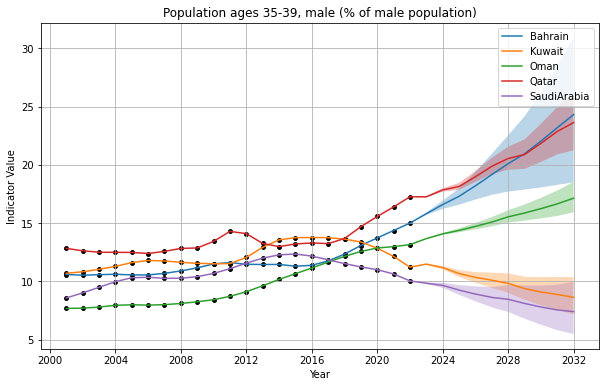

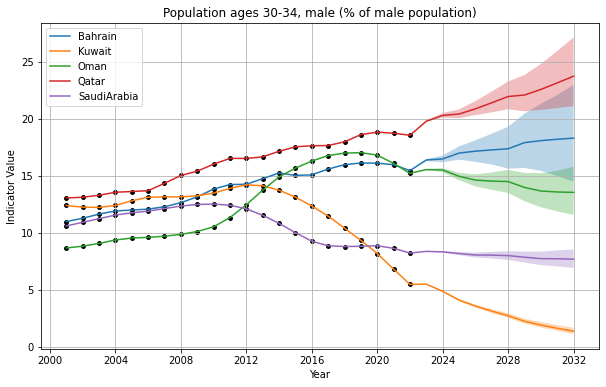

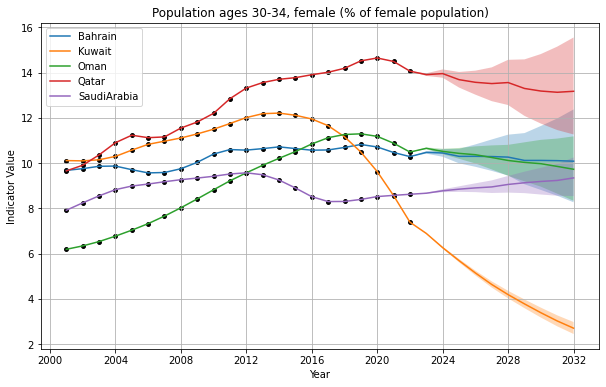

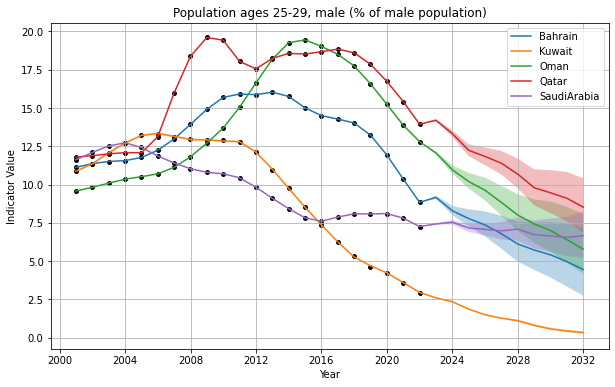

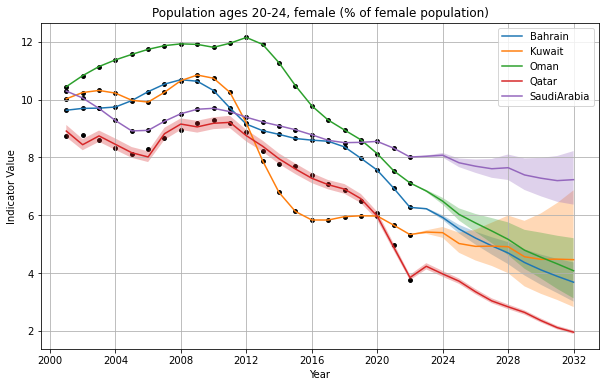

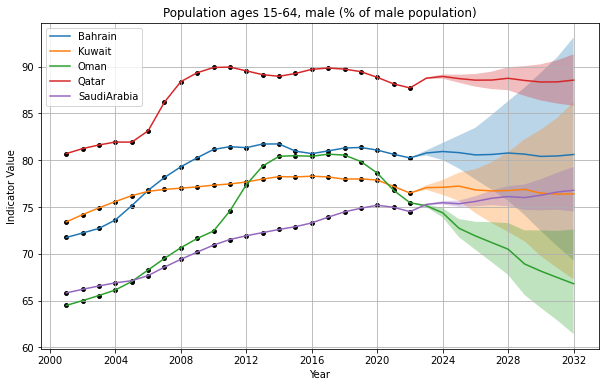

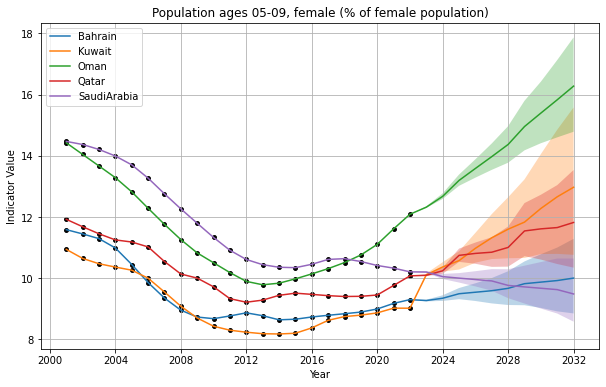

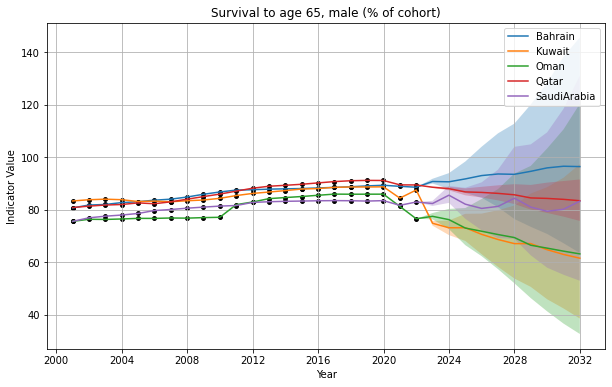

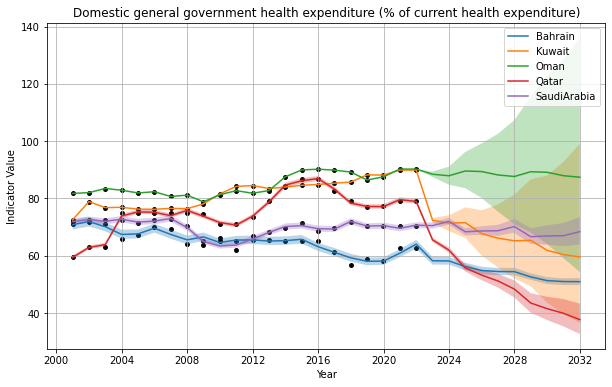

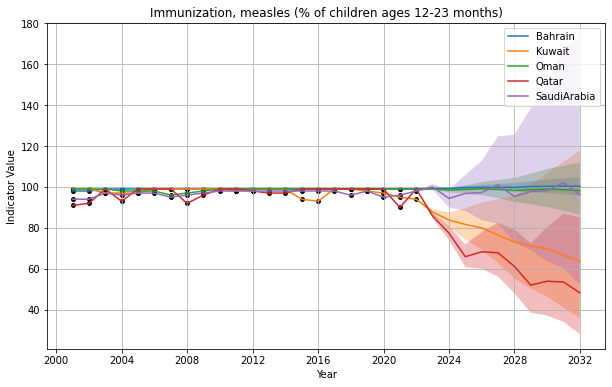

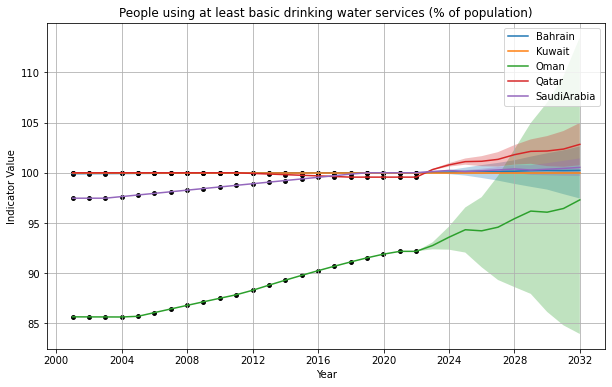

In [70]:
for j in range(len(indis)-1):
    indicator=indis[j]
    # Concatenate indicator columns from each country's DataFrame
    df_concat = pd.concat([df_Bahrain[indicator], 
                           df_Kuwait[indicator], 
                           df_Oman[indicator], 
                           df_Qatar[indicator], 
                           df_SaudiArabia[indicator]], axis=1)
    
    df_concat_yhat_lower=pd.concat([df_Bahrain[indicator+"_yhat_lower"], 
                           df_Kuwait[indicator+"_yhat_lower"], 
                           df_Oman[indicator+"_yhat_lower"], 
                           df_Qatar[indicator+"_yhat_lower"], 
                           df_SaudiArabia[indicator+"_yhat_lower"]], axis=1)
    
    df_concat_yhat_upper=pd.concat([df_Bahrain[indicator+"_yhat_upper"], 
                           df_Kuwait[indicator+"_yhat_upper"], 
                           df_Oman[indicator+"_yhat_upper"], 
                           df_Qatar[indicator+"_yhat_upper"], 
                           df_SaudiArabia[indicator+"_yhat_upper"]], axis=1)
    
    df_concat_y=pd.concat([df_Bahrain[indicator+"_y"], 
                           df_Kuwait[indicator+"_y"], 
                           df_Oman[indicator+"_y"], 
                           df_Qatar[indicator+"_y"], 
                           df_SaudiArabia[indicator+"_y"]], axis=1)

    # Set the country names
    countries = dff_all_indicators_all_countries_inv["Country"].unique().tolist()

    # Plotting the indicator values for each country
    plt.figure(figsize=(10, 6))  # Set the figure size

    for i, country in enumerate(countries):
        plt.plot(df_concat.index, df_concat.iloc[:, i], label=country)
        # Plotting the observed data 'y'
        plt.scatter(df_concat_y.index, df_concat_y.iloc[:, i], color='black', s=15)

        # Plotting the predicted values 'yhat'
        # Filling the area between the upper and lower bounds
        plt.fill_between(df_concat_yhat_lower.index, df_concat_yhat_lower.iloc[:, i],df_concat_yhat_upper.iloc[:, i], alpha=0.3)

    # Add legend and labels
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Indicator Value')
    plt.title(str(indis[j]))
    plt.grid()


    # Show the plot
    plt.show()

## Kruskal Wallis on the forecasted values

In [83]:
for j in range(len(indis)-1):
    indicator=indis[j]
    print(str(indis[j]))
    # Concatenate indicator columns from each country's DataFrame
    df = pd.concat([df_Bahrain[indicator], 
                           df_Kuwait[indicator], 
                           df_Oman[indicator], 
                           df_Qatar[indicator], 
                           df_SaudiArabia[indicator]], axis=1)
    
    df=df.tail(10)
    # Perform the Kruskal-Wallis test
    statistic, p_value = kruskal(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3], df.iloc[:, 4])

    # Print the test statistic and p-value
    print("Kruskal-Wallis Test Statistic:", statistic)
    print("p-value:", p_value)
    
    # Interpret the results
    if p_value < 0.05:
        print("There is statistically significant difference among the groups.")
    else:
        print("There is no statistically significant difference among the groups.")
        
    print("\n")

Population ages 35-39, male (% of male population)
Kruskal-Wallis Test Statistic: 42.784941176470596
p-value: 1.1467535195225313e-08
There is statistically significant difference among the groups.


Population ages 30-34, male (% of male population)
Kruskal-Wallis Test Statistic: 47.05882352941174
p-value: 1.4824956979296822e-09
There is statistically significant difference among the groups.


Population ages 30-34, female (% of female population)
Kruskal-Wallis Test Statistic: 44.76611764705882
p-value: 4.44695143969303e-09
There is statistically significant difference among the groups.


Population ages 25-29, male (% of male population)
Kruskal-Wallis Test Statistic: 36.93835294117645
p-value: 1.8547533115139922e-07
There is statistically significant difference among the groups.


Population ages 20-24, female (% of female population)
Kruskal-Wallis Test Statistic: 37.021176470588216
p-value: 1.7832984660401237e-07
There is statistically significant difference among the groups.


Po